In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import shapiro
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Automobile Dataset
file_path = 'cookie_cats.csv'
df = pd.read_csv(file_path)

# Adjust pd settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


<h1 style='text-align: center; color:#003049'>Evaluating First Gate Levels through the A/B Analysis in Mobile Game</h1>
<hr><br>
<h4>The objective of this project is to determine whether Cookie Cat's first gate should be set at level 30 or level 40. We will analyze the impact of this decision on retention and game rounds through the A/B analysis. </h4><br><br>
<div style="text-align: center;">
  <img src="cat.png">
</div>
<br>
<p>The data is from 90,189 players that installed the game while the AB-test was running. The variables are:</p><hr>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the test group (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first 14 days after installation
</li><li><code>retention_1</code> - did the player come back and play 1 day after installing?</li>
<li><code>retention_7</code> - did the player come back and play 7 days after installing?</li>
</ul><hr>
<p>When a player installed the game, player was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. </p>
</div>

    


In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.shape

(90189, 5)

In [5]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [7]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


<h1 style='color: #003049;'>Information Table: Retention</h1>

<h3>Retention</h3>

In [10]:
# Retention rates
info_df = df.pivot_table(index='version', values=["retention_1","retention_7"], aggfunc=["count","mean"])
info_df.drop(("count", "retention_1"), axis=1, inplace=True)
info_df.columns = ["User_count","R1_Rate","R7_Rate"]


# Retention counts by version
g30r1 = df[(df["retention_1"] == True) & (df["version"] == "gate_30")]["userid"].count()
g30r7 = df[(df["retention_7"] == True) & (df["version"] == "gate_30")]["userid"].count()
g40r1 = df[(df["retention_1"] == True) & (df["version"] == "gate_40")]["userid"].count()
g40r7 = df[(df["retention_7"] == True) & (df["version"] == "gate_40")]["userid"].count()

info_df.loc["gate_30", "R1_Count"] = g30r1
info_df.loc["gate_30", "R7_Count"] = g30r7
info_df.loc["gate_40", "R1_Count"] = g40r1
info_df.loc["gate_40", "R7_Count"] = g40r7

# Data Formatting
info_df["R7_Count"] = info_df["R7_Count"].astype(int)
info_df["R1_Count"] = info_df["R1_Count"].astype(int)

info_df

,User_count,R1_Rate,R7_Rate,R1_Count,R7_Count
version,,,,,
gate_30,44700,0.448188,0.190201,20034,8502
gate_40,45489,0.442283,0.182000,20119,8279


<h3>Downloaded but Never Played</h3>

In [12]:
n_30 = df[(df["sum_gamerounds"] == 0) & (df["version"] == "gate_30")]["userid"].count()
n_40 = df[(df["sum_gamerounds"] == 0) & (df["version"] == "gate_40")]["userid"].count()


info_df.loc["gate_30", "Never_played"] = n_30
info_df.loc["gate_40", "Never_played"] = n_40

info_df["Never_played"] = info_df["Never_played"].astype(int)
info_df

,User_count,R1_Rate,R7_Rate,R1_Count,R7_Count,Never_played
version,,,,,,
gate_30,44700,0.448188,0.190201,20034,8502,1937
gate_40,45489,0.442283,0.182000,20119,8279,2057


<h1 style='color: #003049;'>Data Visualisation</h1>

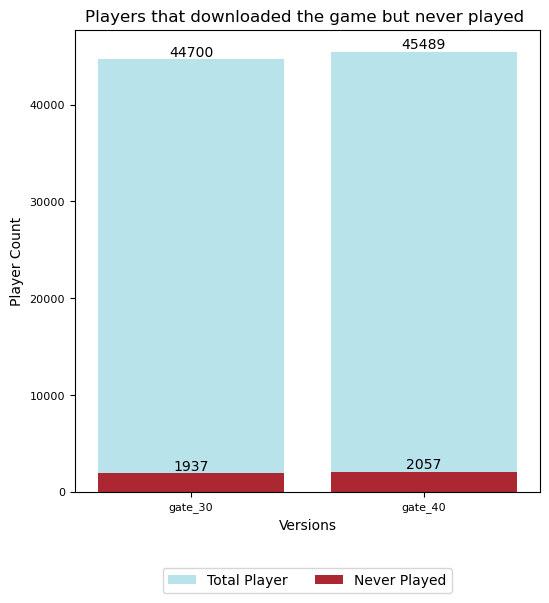

In [14]:
plt.figure(figsize=(6, 6))


barplot = sns.barplot(data=info_df, x=info_df.index, y='User_count', color='#90e0ef', alpha=0.7, label='Total Players')
barplot = sns.barplot(data=info_df, x=info_df.index, y='Never_played', color='#c1121f', alpha=1, label='Never Played')

for container in barplot.containers:
    barplot.bar_label(container, fontsize=10)


# Plt Adjustments
plt.legend()
plt.xlabel('Versions')
plt.ylabel('Player Count')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Players that downloaded the game but never played ')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

plt.show()

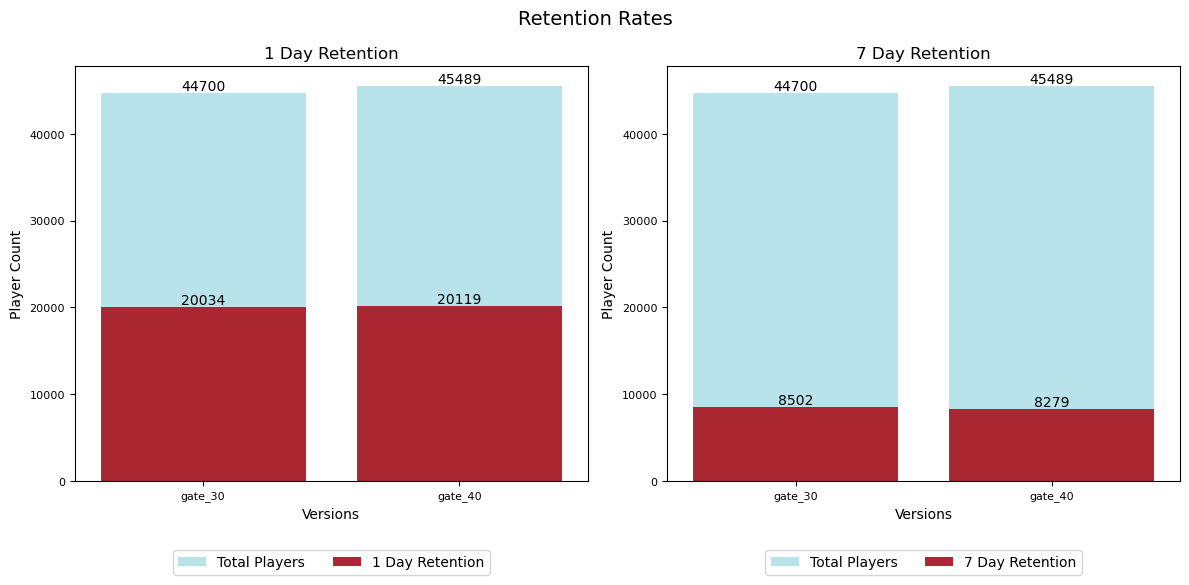

In [15]:
plt.figure(figsize=(12, 6))
plt.suptitle('Retention Rates', fontsize=14)


# Table 1
plt.subplot(1, 2, 1)  

barplot1 = sns.barplot(data=info_df, x=info_df.index, y='User_count', color='#90e0ef', alpha=0.7, label='Total Players')
barplot1 = sns.barplot(data=info_df, x=info_df.index, y='R1_Count', color='#c1121f', alpha=1, label='1 Day Retention')


for container in barplot1.containers:
    barplot1.bar_label(container, fontsize=10)


plt.legend()
plt.xlabel('Versions')
plt.ylabel('Player Count')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('1 Day Retention') 
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

# Table 2
plt.subplot(1, 2, 2)  
barplot2 = sns.barplot(data=info_df, x=info_df.index, y='User_count', color='#90e0ef', alpha=0.7, label='Total Players')
barplot2 = sns.barplot(data=info_df, x=info_df.index, y='R7_Count', color='#c1121f', alpha=1, label='7 Day Retention')


for container in barplot2.containers:
    barplot2.bar_label(container, fontsize=10)


plt.legend()
plt.xlabel('Versions')
plt.ylabel('Player Count')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('7 Day Retention')  
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

plt.tight_layout()
plt.show()

In [16]:
# Determining Retention class

df['Retention_Class'] = df.apply(lambda row: 'No Retention' if not row['retention_1'] and not row['retention_7'] else
                                   'Retained only on Day 1' if row['retention_1'] and not row['retention_7'] else
                                   'Retained on Day 1 and Day 7' if row['retention_1'] and row['retention_7'] else 
                                   "Didn't Retained on Day 1, Retained After Day 7", axis=1).astype(str)

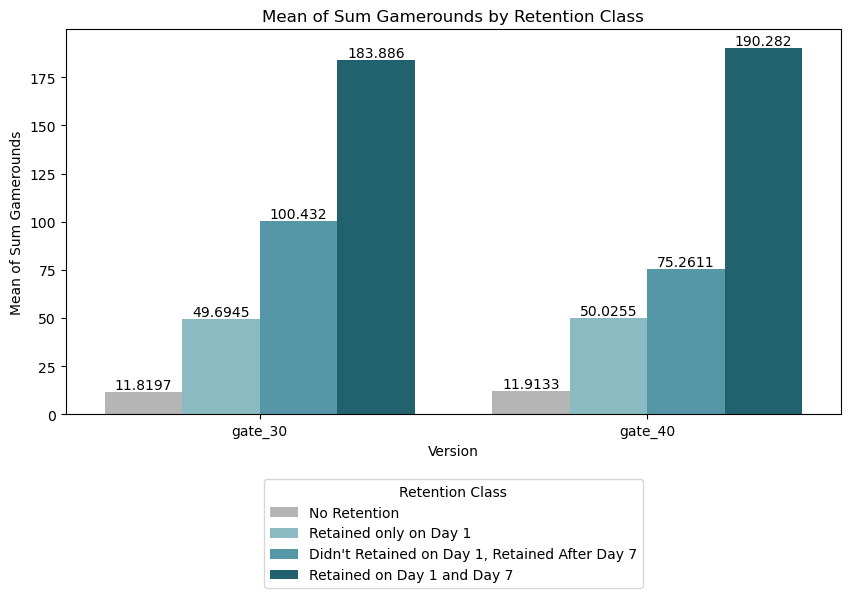

In [17]:
plt.figure(figsize=(10, 5))


grouped_df = df.groupby(["version", "Retention_Class"])["sum_gamerounds"].mean().reset_index()
grouped_df = grouped_df.sort_values(by="sum_gamerounds", ascending=True)

my_palette = ["#B5B5B5", "#82c0ccff", "#489fb5ff", "#16697aff"]


barplot = sns.barplot(data=grouped_df,
                      x="version",
                      y="sum_gamerounds",
                      hue="Retention_Class",
                      palette = my_palette)


for container in barplot.containers:
    barplot.bar_label(container, fontsize=10)



# Plt Adjustments

plt.legend(title="Retention Class", bbox_to_anchor=(0.5, -0.15), loc='upper center')
plt.xlabel("Version")
plt.ylabel("Mean of Sum Gamerounds")
plt.title("Mean of Sum Gamerounds by Retention Class")
plt.show()

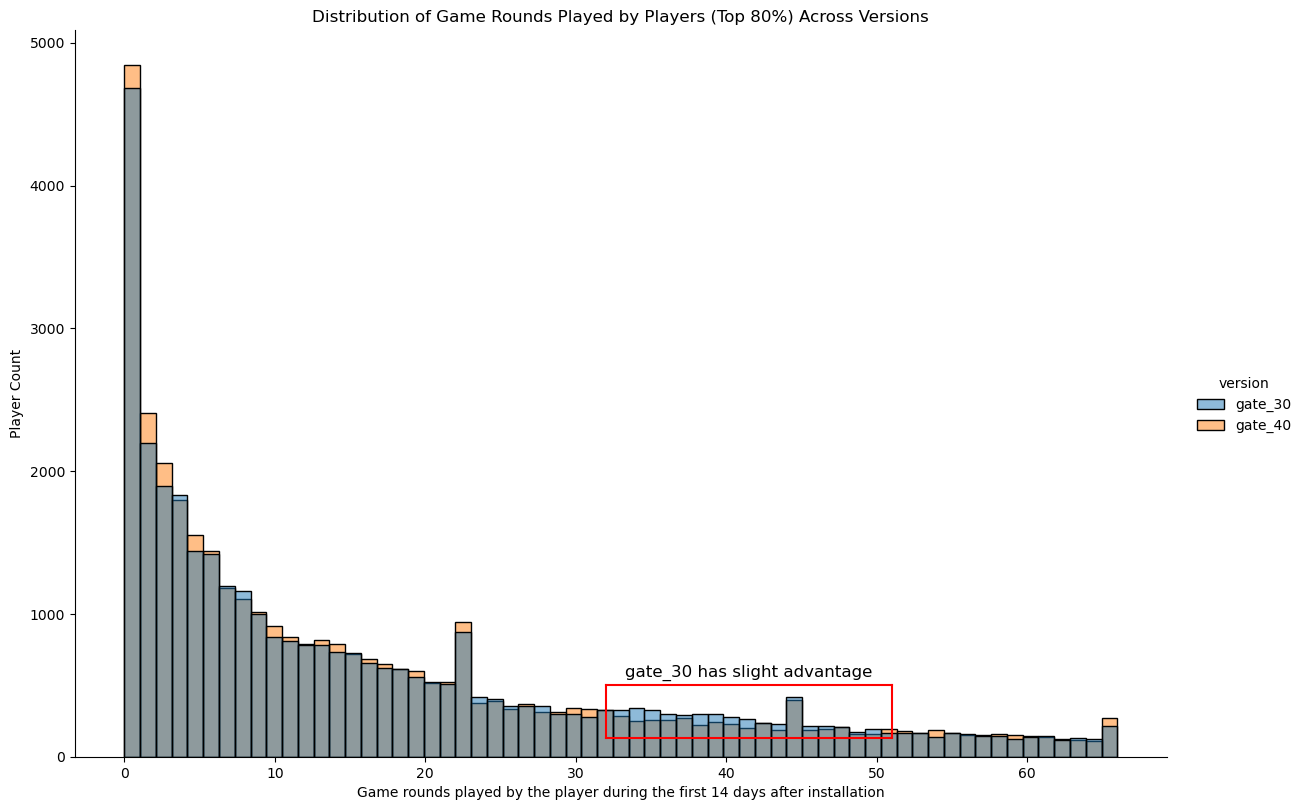

In [18]:
quantile_80 = df["sum_gamerounds"].quantile(0.8)
fifty_rounds = df[df["sum_gamerounds"] < quantile_80]


g = sns.displot(data=fifty_rounds, x="sum_gamerounds", kind="hist", hue="version", height=8, aspect=1.5)


plt.xlabel("Game rounds played by the player during the first 14 days after installation")
plt.ylabel("Player Count")
plt.title("Distribution of Game Rounds Played by Players (Top 80%) Across Versions")

# Highlight Coordinates
intersection_x = [32, 51]
intersection_y = [130, 500]

# Highlight Borders
plt.plot(intersection_x, [intersection_y[0], intersection_y[0]], color='red', linewidth=1.5)  
plt.plot(intersection_x, [intersection_y[1], intersection_y[1]], color='red', linewidth=1.5)  
plt.plot([intersection_x[0], intersection_x[0]], intersection_y, color='red', linewidth=1.5) 
plt.plot([intersection_x[1], intersection_x[1]], intersection_y, color='red', linewidth=1.5)  

plt.text((intersection_x[0] + intersection_x[1]) / 2, intersection_y[1] + 60, "gate_30 has slight advantage",
         horizontalalignment='center', color='black', fontsize=12)

plt.show()

In [19]:
n_30_p = df[(df["version"] == "gate_30") & (df["sum_gamerounds"] < 52) & (df["sum_gamerounds"] > 31)]["userid"].count()
n_40_p = df[(df["version"] == "gate_40") & (df["sum_gamerounds"] < 52) & (df["sum_gamerounds"] > 31)]["userid"].count()

print(f"Total Player count in 'gate_30' group (32-51 game rounds): {n_30_p}")
print(f"Total Player count in 'gate_40' group (32-51 game rounds): {n_40_p}")

print("\033[1m\n According to the distribution table, more players in the 'gate_30' group played between 32-51 game rounds compared to the 'gate_40' group. \n\033[0m")

Total Player count in 'gate_30' group (32-51 game rounds): 5110
Total Player count in 'gate_40' group (32-51 game rounds): 4450

 According to the distribution table, more players in the 'gate_30' group played between 32-51 game rounds compared to the 'gate_40' group. 



<h1 style='color: #003049;'>A/B Testing</h1>

<h2>Methodology :</h2>
    
<h3>Shapiro-Wilk Test:</h3>
    <p><strong>Purpose:</strong> To assess the normality of the sum_gamerounds data for both gate_30 and gate_40 groups.</p>
    <p><strong>Null Hypothesis (H0):</strong> The sum_gamerounds data is normally distributed.</p>
    <p><strong>Alternative Hypothesis (H1):</strong> The sum_gamerounds data is not normally distributed.</p>

    
 <h3>Levene's Test:</h3>
    <p><strong>Purpose :</strong> To assess the equality of variances of sum_gamerounds between gate_30 and gate_40 groups.</p>
    <p><strong>Null Hypothesis (H0):</strong> The variances of sum_gamerounds are equal between the two groups.</p>
    <p><strong>Alternative Hypothesis (H1):</strong> The variances of sum_gamerounds are not equal between the two groups.</p>

 <h3>Mann-Whitney U Test:</h3>
    <p><strong>Purpose:</strong> To compare the distributions of sum_gamerounds between gate_30 and gate_40 groups when normality assumption is violated.</p>
    <p><strong>Null Hypothesis (H0):</strong> There is no difference in the distribution of sum_gamerounds between gate_30 and gate_40 groups.</p>
    <p><strong>Alternative Hypothesis (H1):</strong> There is a difference in the distribution of sum_gamerounds between gate_30 and gate_40 groups.</p>


<h3>Check Normality (Shapiro - Wilk Test)</h3>

In [23]:
# Defining Groups

A = df[df["version"] == "gate_30"]["sum_gamerounds"]
B = df[df["version"] == "gate_40"]["sum_gamerounds"]

In [24]:
#H0 Distribution is Normal
#H1 Distribution is not Normal

normalTestA = shapiro(A)

alpha = 0.05

# Printing the results
if normalTestA.pvalue < alpha:
    
    print(f"\033[1mp value ({normalTestA.pvalue}) is below alpha value ({alpha}) therefore we reject the null hypothesis for group A (gate_30)\n\033[0m")
else:
    print(f"\033[1m p value ({normalTestA.pvalue}) is above alpha value ({alpha}) therefore we fail to reject the null hypothesis for group A (gate_30)\n\033[0m")

p value (0.0) is below alpha value (0.05) therefore we reject the null hypothesis for group A (gate_30)



In [25]:
#H0 Distribution is Normal
#H1 Distribution is not Normal

normalTestB = shapiro(B)

alpha = 0.05

# Printing the results
if normalTestB.pvalue < alpha:
    print(f"\033[1mp p value ({normalTestB.pvalue}) is below alpha value ({alpha}) therefore we reject the null hypothesis for group B (gate_40)\n\033[0m")
else:
    print(f"\033[1m p value ({normalTestB.pvalue}) is above alpha value ({alpha}) therefore we fail to reject the null hypothesis for group B (gate_40)\n\033[0m")

p p value (0.0) is below alpha value (0.05) therefore we reject the null hypothesis for group B (gate_40)



<h3>Check Variances (Levene Test)</h3>

In [27]:
# H0:  The variances of the groups or samples are equal. (Homogeneity)
# H1:  The variances of the groups or samples are not equal. (Heterogeneous)

leveneTest = stats.levene(A,B)

alpha = 0.05

if leveneTest.pvalue < alpha:
    print(f"\033[1m p value ({leveneTest.pvalue}) is below alpha value ({alpha}), therefore we reject the null hypothesis.\n\033[0m")
else:
    print(f"\033[1m p value ({leveneTest.pvalue}) is above alpha value ({alpha}), therefore we fail to reject the null hypothesis.\n\033[0m")

 p value (0.46694516772623273) is above alpha value (0.05), therefore we fail to reject the null hypothesis.



Our data is not normal distributed and homogeneous variances so we apply non parametric test

<h3>Non Parametric Test (Mann Whitney U Test)</h3>

In [30]:
#H0: The distributions of both groups are identical.
#H1: The distributions of the two groups are not identical.

mannWhitneyUTest = stats.mannwhitneyu(A, B)

alpha = 0.05

if mannWhitneyUTest.pvalue < alpha:
    print(f"\033[1m p value ({mannWhitneyUTest.pvalue}) is below alpha value ({alpha}), therefore we reject the null hypothesis.\n\033[0m")
else:
    print(f"\033[1m p value ({mannWhitneyUTest.pvalue}) is above alpha value ({alpha}), therefore we fail to reject the null hypothesis.\n\033[0m")

 p value (0.05020880772044255) is above alpha value (0.05), therefore we fail to reject the null hypothesis.




<h1 style='color: red; text-align: center;'>Conclusion</h1>
        <ul>
            <li>According to A/B testing Results Gate 30 and Gate 40 groups are <b>similar</b>. </li>
            <li>Mann Whitney-U Test p value appears = 0.0502 , a value that closely resembles to our alpha level. Therefore making this A/B test in a larger data set will lead to a clear conclusions</li>
            <li>When the gate is moved to level 40, fewer players make it far enough compared to level 30 group</li>
        </ul>
        <h3 style='color: red; text-align: center;'><u>There is no significiant difference between Gate 30 and Gate 40 groups.</u></h3>
  </div>
    